# Machine Learning Project for CS504
### Professor: Dr. Jessica Lin
### Student: Angel N. Sierra
### GMU

**Research Article Title:** Data driven prediction models of energy use of appliances in a low-energy house
**Researchers:** Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix

#### General Data Analysis and Data Preparation
This section would provide the initial analysis and data preparation performed by the researchers with the end goal of ensuring a common baseline. Once baseline comparison is performed I would proceed to augment the research by adding a new machine learning algorithm and executing similar activities in WEKA to compare results.

#### Machine Learning: Data Preparation
This section was created to make the necessary changes on the data set to make it appropriate for ML Algorithms.


In [1]:
#Upload the full data set
energy_data <- read.csv("00 - Data Set/full_set.csv")
energy_data$date <- strptime(as.character(energy_data$date),format="%Y-%m-%d %H:%M:%S")
energy_data$date <- as.POSIXct(energy_data$date,tz="UTC")

str(energy_data$date)

 POSIXct[1:19735], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" ...


In [2]:
#Upload the train data set
train_data <- read.csv("00 - Data Set//training.csv")
train_data$date <- strptime(as.character(train_data$date),format="%Y-%m-%d %H:%M:%S")
train_data$date <- as.POSIXct(train_data$date,tz="UTC")

str(train_data$date)

 POSIXct[1:14803], format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" ...


In [3]:
#Upload the test data set
test_data <- read.csv("00 - Data Set//testing.csv")
test_data$date <- strptime(as.character(test_data$date),format="%Y-%m-%d %H:%M:%S")
test_data$date <- as.POSIXct(test_data$date,tz="UTC")

str(test_data$date)

 POSIXct[1:4932], format: "2016-01-11 17:30:00" "2016-01-11 18:00:00" "2016-01-11 18:40:00" ...


In [9]:
#Include the appropriate libraries to run Boruta
suppressWarnings(library(Boruta))

#Use boruta on full data set to obtain the feature importance
Boruta.Appliances_Full_Set <- Boruta(Appliances~., data=energy_data, doTrace=2, ntree=115)

Loading required package: ranger
 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +54 secs: 
 confirmed 29 attributes: date, Day_of_week, lights, NSM, Press_mm_hg and 24 more;
 still have 2 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
 21. run of importance source...
 22. run of importance source...
 23. run of importance source...
 24. run of importance source...
 25. run of importance source...
 26.

In [10]:
#Use boruta on train data set to obtain the feature importance
Boruta.Appliances_Train_Set <- Boruta(Appliances~., data=train_data, doTrace=2, ntree=115)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +37 secs: 
 confirmed 29 attributes: date, Day_of_week, lights, NSM, Press_mm_hg and 24 more;
 still have 2 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
 21. run of importance source...
 22. run of importance source...
 23. run of importance source...
 24. run of importance source...
 25. run of importance source...
 26. run of importance source...
 27.

In [11]:
#Use boruta on test data set to obtain the feature importance
Boruta.Appliances_Test_Set <- Boruta(Appliances~., data=test_data, doTrace=2, ntree=115)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +10 secs: 
 confirmed 28 attributes: date, Day_of_week, lights, NSM, Press_mm_hg and 23 more;
 still have 3 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
 21. run of importance source...
 22. run of importance source...
 23. run of importance source...
 24. run of importance source...
 25. run of importance source...
 26. run of importance source...
 27.

png 
  2

Boruta performed 99 iterations in 7.368907 mins.
 29 attributes confirmed important: date, Day_of_week, lights, NSM,
Press_mm_hg and 24 more;
 No attributes deemed unimportant.
 2 tentative attributes left: rv1, rv2;


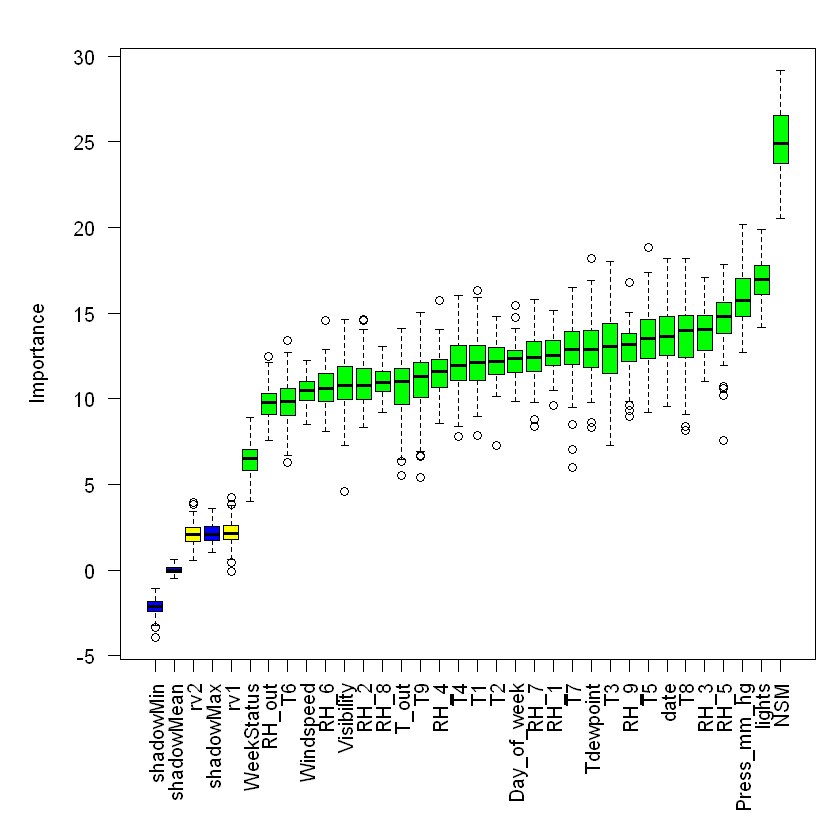

In [21]:
#Save Full Data Set Output as image
png('04-01-01-Feature_Importance_with_Boruta_Full_DS.png',width = 14, height = 10, units = 'in', res = 300)
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Full_Set,cex.axis=1,las=2,xlab="")
dev.off()

#Capture Full Data Set Output as text
capture.output(Boruta.Appliances_Full_Set, file = "04-01-02-Feature_Importance_with_Boruta_Full_DS.txt")

#Display Full Data Set Output as image
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Full_Set,cex.axis=1,las=2,xlab="")
print(Boruta.Appliances_Full_Set)

png 
  2

Boruta performed 99 iterations in 5.174527 mins.
 29 attributes confirmed important: date, Day_of_week, lights, NSM,
Press_mm_hg and 24 more;
 No attributes deemed unimportant.
 2 tentative attributes left: rv1, rv2;


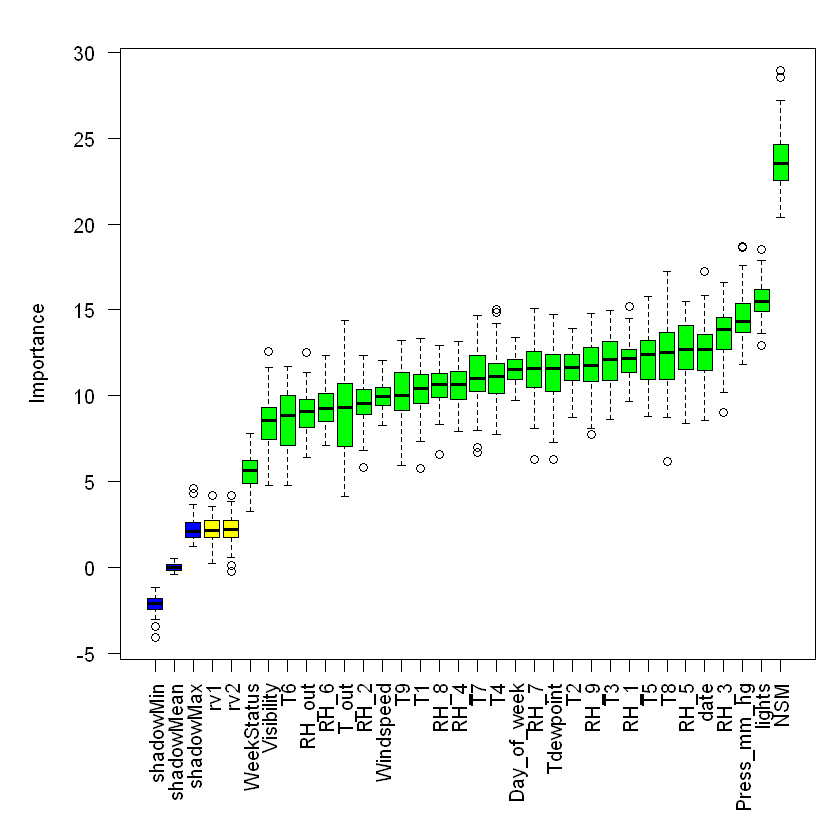

In [22]:
#Save Train Data Set Output as image
png('04-02-01-Feature_Importance_with_Boruta_Train_DS.png',width = 14, height = 10, units = 'in', res = 300)
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Train_Set,cex.axis=1,las=2,xlab="")
dev.off()

#Capture Train Data Set Output as text
capture.output(Boruta.Appliances_Train_Set, file = "04-02-02-Feature_Importance_with_Boruta_Train_DS.txt")

#Display Train Data Set Output as image
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Train_Set,cex.axis=1,las=2,xlab="")
print(Boruta.Appliances_Train_Set)

png 
  2

Boruta performed 51 iterations in 41.91001 secs.
 29 attributes confirmed important: date, Day_of_week, lights, NSM,
Press_mm_hg and 24 more;
 2 attributes confirmed unimportant: rv1, rv2;


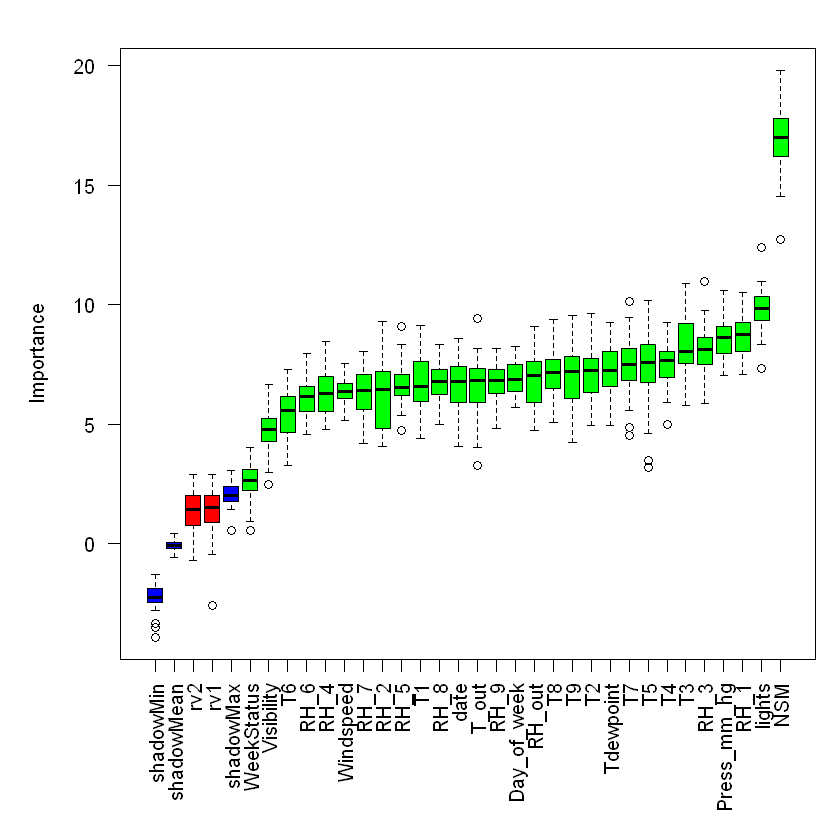

In [23]:
#Save Test Data Set Output as image
png('04-03-01-Feature_Importance_with_Boruta_Test_DS.png',width = 14, height = 10, units = 'in', res = 300)
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Test_Set,cex.axis=1,las=2,xlab="")
dev.off()

#Capture Test Data Set Output as text
capture.output(Boruta.Appliances_Test_Set, file = "04-03-02-Feature_Importance_with_Boruta_Test_DS.txt")

#Display Train Data Set Output as image
par( mar=c(7.5, 5, 2, 1))
plot(Boruta.Appliances_Test_Set,cex.axis=1,las=2,xlab="")
print(Boruta.Appliances_Test_Set)

**note:**
The below code needs to be adjusted for this project environment and executed in R

In [24]:
#The following code was executed in R Studio, it was necessary to have access to the "dummies" package.

#new_full_data <- dummy.data.frame(full_data_set,names=c("WeekStatus", "Day_of_week"))
#write.table(format(new_full_data, digits=19),file="00 - Project/00 - Data Set/01_new_full_data_set.csv",sep=",",row.names=FALSE)

#new_training_data <- dummy.data.frame(train_data_set,names=c("WeekStatus", "Day_of_week"))
#write.table(format(new_training_data, digits=19),file="00 - Project/00 - Data Set/02_new_train_data_set.csv",sep=",",row.names=FALSE)

#new_testing_data <- dummy.data.frame(test_data_set,names=c("WeekStatus", "Day_of_week"))
#write.table(format(new_testing_data, digits=19),file="00 - Project/00 - Data Set/03_new_test_data_set.csv",sep=",",row.names=FALSE)

In [27]:
str(train_data)

'data.frame':	14803 obs. of  32 variables:
 $ date       : POSIXct, format: "2016-01-11 17:00:00" "2016-01-11 17:10:00" ...
 $ Appliances : int  60 60 50 60 50 60 60 70 430 250 ...
 $ lights     : int  30 30 30 40 40 50 40 40 50 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.3 46 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.5 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 44.9 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.5 45.7 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55 ...
 $ T6         : num  7.03 6.83 6.56 6.37 6.3 ...
 $ RH_6       : num  84.3 84.1 83.2 84.9 85.8 ...
 $ T7         : num  17.2 17.2 17.2 17.2 17.1 ...
 $ RH_7       : num  41.6 41.6 41.4 41.2 41.3 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 ...
 $ RH_8       : num  48.9 4